In [1]:
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Number of tasks
num_tasks = 10

# Generate random task times (mean=5, std=1)
task_times = np.random.normal(5, 1, num_tasks)

# Define precedence relationships (example)
precedence = {
    1: [],
    2: [1],
    3: [1],
    4: [2, 3],
    5: [4],
    6: [4],
    7: [5, 6],
    8: [7],
    9: [8],
    10: [9],
}

print("Task Times:", task_times)
print("Precedence Relationships:", precedence)

Task Times: [5.49671415 4.8617357  5.64768854 6.52302986 4.76584663 4.76586304
 6.57921282 5.76743473 4.53052561 5.54256004]
Precedence Relationships: {1: [], 2: [1], 3: [1], 4: [2, 3], 5: [4], 6: [4], 7: [5, 6], 8: [7], 9: [8], 10: [9]}


In [6]:
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Number of tasks
num_tasks = 10

# Generate random task times (mean=5, std=1)
task_times = np.random.normal(5, 1, num_tasks)
print("Task Times:", task_times)


Task Times: [5.49671415 4.8617357  5.64768854 6.52302986 4.76584663 4.76586304
 6.57921282 5.76743473 4.53052561 5.54256004]


In [27]:
allowance = 0.15
normal_time = np.mean(task_times)
standard_time = normal_time * (1 + allowance)
print(f"Normal Time: {normal_time:f}")
print(f"Standard Time: {standard_time:f}")

Normal Time: 5.448061
Standard Time: 6.265270


In [8]:
from scipy.stats import norm

# Error margin and confidence level
error_margin = 0.05
confidence_level = 0.95

# Calculate sample size
z_value = norm.ppf(1 - (1 - confidence_level) / 2)
sample_size = (z_value * np.std(task_times) / (error_margin * np.mean(task_times))) ** 2
print("Sample Size:", int(np.ceil(sample_size)))

Sample Size: 25


In [9]:
# Example layout problem solution using Modified Spanning Tree
# (This is a simplified example for illustration purposes)

# Define the distances between workstations
distances = np.random.randint(1, 10, size=(num_tasks, num_tasks))
np.fill_diagonal(distances, 0)

# Apply the Modified Spanning Tree approach
from scipy.sparse.csgraph import minimum_spanning_tree

mst = minimum_spanning_tree(distances)
print("Minimum Spanning Tree:\n", mst.toarray().astype(int))

Minimum Spanning Tree:
 [[0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [10]:
def calculate_metrics(stations, task_times, cycle_time):
    total_time = sum(task_times)
    num_stations = len(stations)
    balance_delay = (num_stations * cycle_time - total_time) / (
        num_stations * cycle_time
    )
    line_efficiency = total_time / (num_stations * cycle_time)
    smoothness_index = sum(
        (cycle_time - sum(task_times[task - 1] for task in station)) ** 2
        for station in stations
    )

    return balance_delay, line_efficiency, smoothness_index


balance_delay, line_efficiency, smoothness_index = calculate_metrics(
    stations, task_times, cycle_time
)
print("Balance Delay:", balance_delay)
print("Line Efficiency:", line_efficiency)
print("Smoothness Index:", smoothness_index)

NameError: name 'stations' is not defined

In [3]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment="EV Battery Assembly Process")

# Define the tasks
tasks = [
    "Cell Inspection",
    "Cell Stacking",
    "Welding",
    "Module Assembly",
    "Module Testing",
    "Pack Assembly",
    "Pack Testing",
    "Cooling System Installation",
    "Final Inspection",
    "Packaging",
]

# Add nodes for each task
for task in tasks:
    dot.node(task, task)

# Define the edges (flow) between tasks
edges = [
    ("Cell Inspection", "Cell Stacking"),
    ("Cell Stacking", "Welding"),
    ("Welding", "Module Assembly"),
    ("Module Assembly", "Module Testing"),
    ("Module Testing", "Pack Assembly"),
    ("Pack Assembly", "Pack Testing"),
    ("Pack Testing", "Cooling System Installation"),
    ("Cooling System Installation", "Final Inspection"),
    ("Final Inspection", "Packaging"),
]

# Add edges to the graph
for edge in edges:
    dot.edge(edge[0], edge[1])

# Render the graph to a file
dot.render("ev_battery_assembly_flow_chart", format="png", view=True)

'ev_battery_assembly_flow_chart.png'

In [4]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment="EV Battery Assembly Process")

# Define the tasks and decision points
tasks = {
    "Start": "ellipse",
    "Cell Inspection": "box",
    "Inspection OK?": "diamond",
    "Cell Stacking": "box",
    "Welding": "box",
    "Welding OK?": "diamond",
    "Module Assembly": "box",
    "Module Testing": "box",
    "Testing OK?": "diamond",
    "Pack Assembly": "box",
    "Pack Testing": "box",
    "Pack Quality OK?": "diamond",
    "Cooling System Installation": "box",
    "Final Inspection": "box",
    "Final Quality OK?": "diamond",
    "Packaging": "box",
    "End": "ellipse",
}

# Add nodes for each task with specified shapes
for task, shape in tasks.items():
    dot.node(task, task, shape=shape)

# Define the edges (flow) between tasks with decision points
edges = [
    ("Start", "Cell Inspection"),
    ("Cell Inspection", "Inspection OK?"),
    ("Inspection OK?", "Cell Stacking", "yes"),
    ("Inspection OK?", "Cell Inspection", "no"),
    ("Cell Stacking", "Welding"),
    ("Welding", "Welding OK?"),
    ("Welding OK?", "Module Assembly", "yes"),
    ("Welding OK?", "Welding", "no"),
    ("Module Assembly", "Module Testing"),
    ("Module Testing", "Testing OK?"),
    ("Testing OK?", "Pack Assembly", "yes"),
    ("Testing OK?", "Module Assembly", "no"),
    ("Pack Assembly", "Pack Testing"),
    ("Pack Testing", "Pack Quality OK?"),
    ("Pack Quality OK?", "Cooling System Installation", "yes"),
    ("Pack Quality OK?", "Pack Assembly", "no"),
    ("Cooling System Installation", "Final Inspection"),
    ("Final Inspection", "Final Quality OK?"),
    ("Final Quality OK?", "Packaging", "yes"),
    ("Final Quality OK?", "Final Inspection", "no"),
    ("Packaging", "End"),
]

# Add edges to the graph with labels for decision points
for edge in edges:
    if len(edge) == 3:
        dot.edge(edge[0], edge[1], label=edge[2])
    else:
        dot.edge(edge[0], edge[1])

# Render the graph to a file
dot.render("ev_battery_assembly_flow_chart_detailed", format="png", view=True)

'ev_battery_assembly_flow_chart_detailed.png'

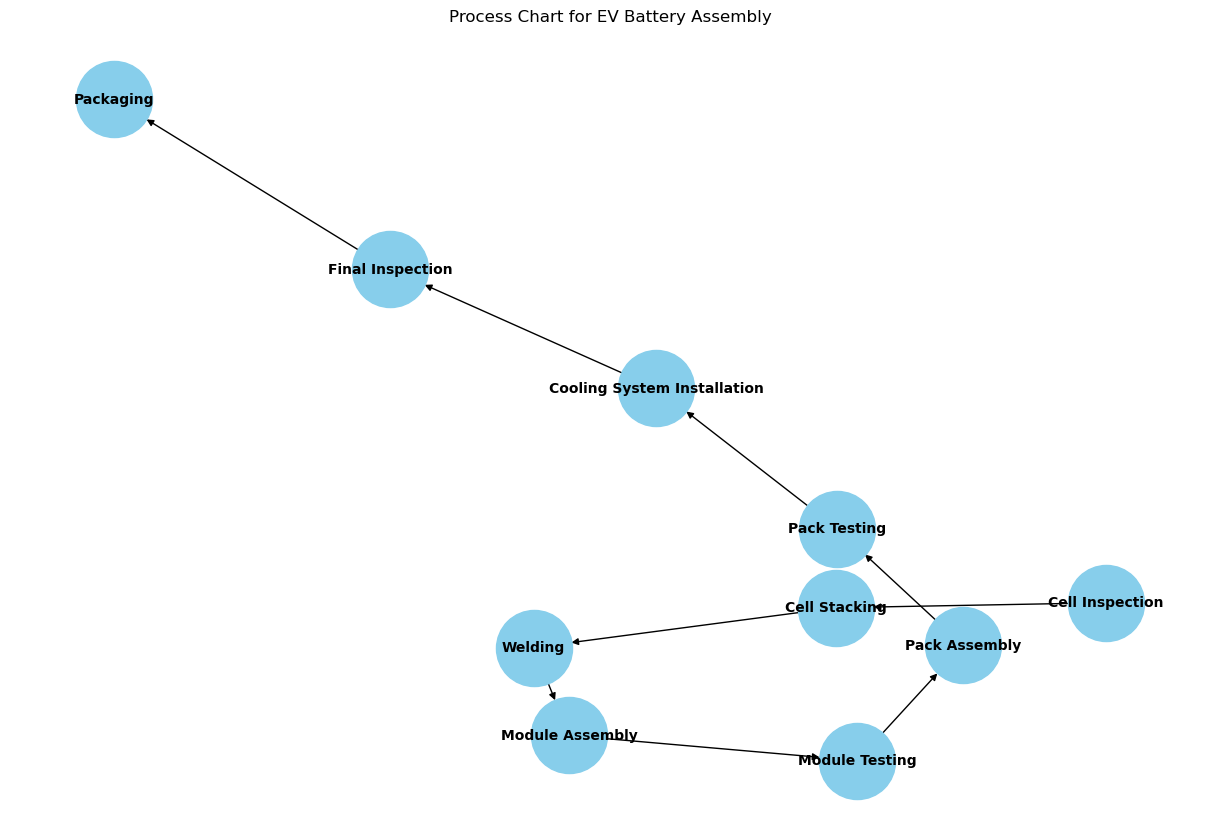

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the process chart
G = nx.DiGraph()
tasks = [
    "Cell Inspection",
    "Cell Stacking",
    "Welding",
    "Module Assembly",
    "Module Testing",
    "Pack Assembly",
    "Pack Testing",
    "Cooling System Installation",
    "Final Inspection",
    "Packaging",
]
for i in range(len(tasks) - 1):
    G.add_edge(tasks[i], tasks[i + 1])

# Draw the process chart
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    arrows=True,
)
plt.title("Process Chart for EV Battery Assembly")
plt.show()

In [11]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment="Manufacturing Process Flow Chart")

# Define the tasks and decision points
tasks = {
    "Start": "ellipse",
    "Material Inspection": "box",
    "Inspection Passed?": "diamond",
    "Cutting": "box",
    "Welding": "box",
    "Welding Quality OK?": "diamond",
    "Assembly": "box",
    "Painting": "box",
    "Painting Quality OK?": "diamond",
    "Final Inspection": "box",
    "Final Quality OK?": "diamond",
    "Packaging": "box",
    "End": "ellipse",
}

# Add nodes for each task with specified shapes
for task, shape in tasks.items():
    dot.node(task, task, shape=shape)

# Define the edges (flow) between tasks with decision points
edges = [
    ("Start", "Material Inspection"),
    ("Material Inspection", "Inspection Passed?"),
    ("Inspection Passed?", "Cutting", "yes"),
    ("Inspection Passed?", "Material Inspection", "no"),
    ("Cutting", "Welding"),
    ("Welding", "Welding Quality OK?"),
    ("Welding Quality OK?", "Assembly", "yes"),
    ("Welding Quality OK?", "Cutting", "no"),
    ("Assembly", "Painting"),
    ("Painting", "Painting Quality OK?"),
    ("Painting Quality OK?", "Final Inspection", "yes"),
    ("Painting Quality OK?", "Assembly", "no"),
    ("Final Inspection", "Final Quality OK?"),
    ("Final Quality OK?", "Packaging", "yes"),
    ("Final Quality OK?", "Painting", "no"),
    ("Packaging", "End"),
]

# Add edges to the graph with labels for decision points
for edge in edges:
    if len(edge) == 3:
        dot.edge(edge[0], edge[1], label=edge[2])
    else:
        dot.edge(edge[0], edge[1])

# Render the graph to a file
dot.render("manufacturing_process_flow_chart", format="png", view=True)

'manufacturing_process_flow_chart.png'

In [12]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Assembly Line Balancing')

# Define the tasks with cycle times and stations
tasks = {
    "Start": "ellipse",
    "Station 1: Material Preparation\nCycle Time: 5 min": "box",
    "Station 2: Cutting\nCycle Time: 10 min": "box",
    "Station 3: Welding\nCycle Time: 15 min": "box",
    "Station 4: Assembly\nCycle Time: 20 min": "box",
    "Station 5: Painting\nCycle Time: 25 min": "box",
    "Station 6: Final Inspection\nCycle Time: 10 min": "box",
    "End": "ellipse"
}

# Add nodes for each task with specified shapes
for task, shape in tasks.items():
    dot.node(task, task, shape=shape)

# Define the edges (flow) between tasks
edges = [
    ("Start", "Station 1: Material Preparation\nCycle Time: 5 min"),
    ("Station 1: Material Preparation\nCycle Time: 5 min", "Station 2: Cutting\nCycle Time: 10 min"),
    ("Station 2: Cutting\nCycle Time: 10 min", "Station 3: Welding\nCycle Time: 15 min"),
    ("Station 3: Welding\nCycle Time: 15 min", "Station 4: Assembly\nCycle Time: 20 min"),
    ("Station 4: Assembly\nCycle Time: 20 min", "Station 5: Painting\nCycle Time: 25 min"),
    ("Station 5: Painting\nCycle Time: 25 min", "Station 6: Final Inspection\nCycle Time: 10 min"),
    ("Station 6: Final Inspection\nCycle Time: 10 min", "End")
]

# Add edges to the graph
for edge in edges:
    dot.edge(edge[0], edge[1])

# Render the graph to a file
dot.render('assembly_line_balancing_flow_chart', format='png', view=True)



Cycle Time unrecognized
Cycle Time unrecognized
Cycle Time unrecognized
Cycle Time unrecognized
Cycle Time unrecognized
Cycle Time unrecognized


'assembly_line_balancing_flow_chart.png'

In [14]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def union(self, parent, rank, x, y):
        root_x = self.find(parent, x)
        root_y = self.find(parent, y)
        if rank[root_x] < rank[root_y]:
            parent[root_x] = root_y
        elif rank[root_x] > rank[root_y]:
            parent[root_y] = root_x
        else:
            parent[root_y] = root_x
            rank[root_x] += 1

    def kruskal_mst(self):
        result = []
        i = 0
        e = 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
        return result


# Create a graph with 6 vertices
g = Graph(6)
g.add_edge(0, 1, 10)
g.add_edge(0, 2, 15)
g.add_edge(0, 3, 20)
g.add_edge(0, 4, 25)
g.add_edge(0, 5, 30)
g.add_edge(1, 2, 35)
g.add_edge(1, 3, 25)
g.add_edge(1, 4, 30)
g.add_edge(1, 5, 40)
g.add_edge(2, 3, 10)
g.add_edge(2, 4, 20)
g.add_edge(2, 5, 25)
g.add_edge(3, 4, 15)
g.add_edge(3, 5, 30)
g.add_edge(4, 5, 10)

# Find the MST
mst = g.kruskal_mst()

# Print the MST
print("Edges in the Minimum Spanning Tree:")
for u, v, weight in mst:
    print(f"{chr(u + 65)} - {chr(v + 65)}: {weight} meters")

Edges in the Minimum Spanning Tree:
A - B: 10 meters
C - D: 10 meters
E - F: 10 meters
A - C: 15 meters
D - E: 15 meters


In [15]:
# Calculate the total distance of the MST
total_mst_distance = sum(weight for _, _, weight in mst)

# Calculate the total possible distance
total_possible_distance = sum(
    [10, 15, 20, 25, 30, 35, 25, 30, 40, 10, 20, 25, 15, 30, 10]
)

# Calculate the efficiency
efficiency = (1 - (total_mst_distance / total_possible_distance)) * 100

print(f"Total Distance of MST: {total_mst_distance} meters")
print(f"Total Possible Distance: {total_possible_distance} meters")
print(f"Efficiency of the Layout: {efficiency:.2f}%")

Total Distance of MST: 60 meters
Total Possible Distance: 340 meters
Efficiency of the Layout: 82.35%


In [16]:
import pandas as pd

# Define the departments
departments = ["A", "B", "C", "D", "E", "F"]

# Define the distances between departments
distances = {
    ("A", "B"): 10,
    ("A", "C"): 15,
    ("A", "D"): 20,
    ("A", "E"): 25,
    ("A", "F"): 30,
    ("B", "C"): 35,
    ("B", "D"): 25,
    ("B", "E"): 30,
    ("B", "F"): 40,
    ("C", "D"): 10,
    ("C", "E"): 20,
    ("C", "F"): 25,
    ("D", "E"): 15,
    ("D", "F"): 30,
    ("E", "F"): 10,
}

# Create an empty DataFrame for the from-to matrix
from_to_matrix = pd.DataFrame(index=departments, columns=departments)

# Fill the from-to matrix with distances
for (from_dept, to_dept), distance in distances.items():
    from_to_matrix.at[from_dept, to_dept] = distance
    from_to_matrix.at[to_dept, from_dept] = distance

# Fill diagonal with zeros (distance from a department to itself)
for dept in departments:
    from_to_matrix.at[dept, dept] = 0

# Display the from-to matrix
print("From-To Matrix:")
print(from_to_matrix)

From-To Matrix:
    A   B   C   D   E   F
A   0  10  15  20  25  30
B  10   0  35  25  30  40
C  15  35   0  10  20  25
D  20  25  10   0  15  30
E  25  30  20  15   0  10
F  30  40  25  30  10   0


In [29]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Flow Process Chart for Production Planning and Control')

# Add nodes for each chapter and key sections
dot.node('1', 'Chapter 1: Introduction')
dot.node('1.1', 'Overview of the Project')
dot.node('1.2', 'Objectives')
dot.node('1.3', 'Scope')
dot.node('1.4', 'Methodology')

dot.node('2', 'Chapter 2: Literature Review')
dot.node('2.1', 'Introduction to Line Balancing')
dot.node('2.2', 'Overview of COMSOAL Method')
dot.node('2.3', 'Comparison with Other Methods')
dot.node('2.4', 'Applications in Industry')

dot.node('3', 'Chapter 3: Methodology')
dot.node('3.1', 'Data Collection')
dot.node('3.2', 'Precedence Diagram')
dot.node('3.3', 'Task Time Calculation')
dot.node('3.4', 'Theoretical Minimum Number of Workstations')
dot.node('3.5', 'COMSOAL Method Steps')

dot.node('4', 'Chapter 4: Implementation')
dot.node('4.1', 'Input Data')
dot.node('4.2', 'From-To Matrix')
dot.node('4.3', 'Process Chart Creation')
dot.node('4.4', 'Task Assignment to Workstations')
dot.node('4.5', 'Example Solution')
dot.node('4.6', 'Python Code for Implementation')

dot.node('5', 'Chapter 5: Results and Analysis')
dot.node('5.1', 'Analysis of COMSOAL Method')
dot.node('5.2', 'Comparison with Other Methods')
dot.node('5.3', 'Efficiency and Balance Delay')
dot.node('5.4', 'Smoothness Index Calculation')
dot.node('5.5', 'Case Study: T-Shirt Production')

dot.node('6', 'Chapter 6: Conclusion and Recommendations')
dot.node('6.1', 'Summary of Findings')
dot.node('6.2', 'Recommendations for Future Work')
dot.node('6.3', 'Limitations of the Study')
dot.node('6.4', 'Final Thoughts')

dot.node('7', 'Chapter 7: References')
dot.node('7.1', 'Books')
dot.node('7.2', 'Articles')
dot.node('7.3', 'Websites')
dot.node('7.4', 'Videos')

# Add edges to represent the flow between chapters and sub-sections
dot.edges(['11', '12', '13', '14'])
dot.edges(['21', '22', '23', '24'])
dot.edges(['31', '32', '33', '34', '35'])
dot.edges(['41', '42', '43', '44', '45', '46'])
dot.edges(['51', '52', '53', '54', '55'])
dot.edges(['61', '62', '63', '64'])
dot.edges(['71', '72', '73', '74'])

# Add edges to represent the flow between chapters
dot.edge('1', '2')
dot.edge('2', '3')
dot.edge('3', '4')
dot.edge('4', '5')
dot.edge('5', '6')
dot.edge('6', '7')

# Render the graph to a file
dot.render('flow_process_chart', format='pdf')

# Display the graph
dot.view()



'flow_process_chart.pdf'

In [34]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Flow Process Chart for Production Planning and Control')

# Define chapters and sub-sections
chapters = {
    '1': ['1.1', '1.2', '1.3', '1.4'],
    '2': ['2.1', '2.2', '2.3', '2.4'],
    '3': ['3.1', '3.2', '3.3', '3.4', '3.5'],
    '4': ['4.1', '4.2', '4.3', '4.4', '4.5', '4.6'],
    '5': ['5.1', '5.2', '5.3', '5.4', '5.5'],
    '6': ['6.1', '6.2', '6.3', '6.4'],
    '7': ['7.1', '7.2', '7.3', '7.4']
}

transport_nodes = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6']

# Add chapter and sub-section nodes
for chapter, sections in chapters.items():
    dot.node(chapter, f'Chapter {chapter}')
    for section in sections:
        dot.node(section, f'Section {section}')

# Add transportation nodes
for i, transport in enumerate(transport_nodes, start=1):
    dot.node(transport, f'Transport to Chapter {i + 1}', shape='ellipse', style='dashed')

# Add edges within chapters
for chapter, sections in chapters.items():
    for i in range(len(sections) - 1):
        dot.edge(sections[i], sections[i + 1])

# Add edges between chapters and transportation
for i, transport in enumerate(transport_nodes):
    dot.edge(str(i + 1), transport)
    dot.edge(transport, str(i + 2))

# Render the graph to a file
dot.render('flow_process_chart_with_transportation', format='pdf')

# Display the graph
dot.view()


'flow_process_chart_with_transportation.pdf'

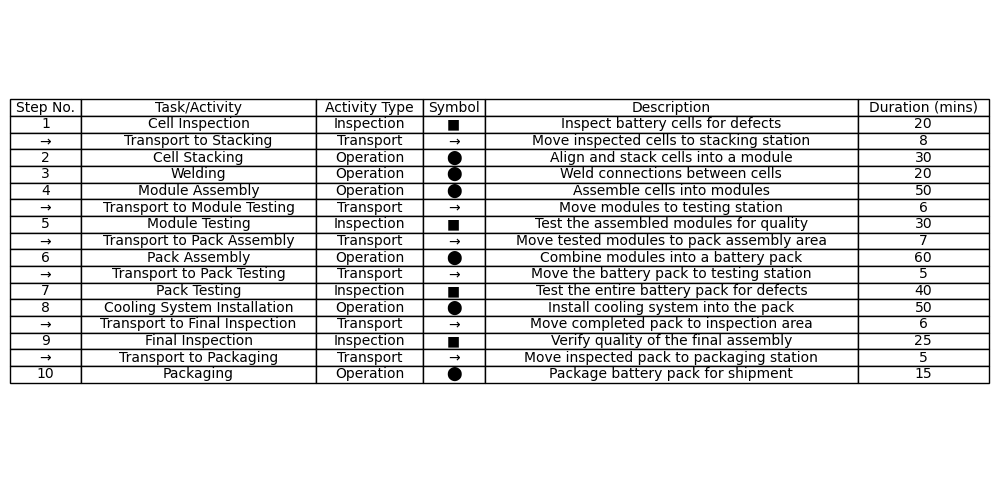

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the process chart
data = {
    "Step No.": [
        "1",
        "→",
        "2",
        "3",
        "4",
        "→",
        "5",
        "→",
        "6",
        "→",
        "7",
        "8",
        "→",
        "9",
        "→",
        "10",
    ],
    "Task/Activity": [
        "Cell Inspection",
        "Transport to Stacking",
        "Cell Stacking",
        "Welding",
        "Module Assembly",
        "Transport to Module Testing",
        "Module Testing",
        "Transport to Pack Assembly",
        "Pack Assembly",
        "Transport to Pack Testing",
        "Pack Testing",
        "Cooling System Installation",
        "Transport to Final Inspection",
        "Final Inspection",
        "Transport to Packaging",
        "Packaging",
    ],
    "Activity Type": [
        "Inspection",
        "Transport",
        "Operation",
        "Operation",
        "Operation",
        "Transport",
        "Inspection",
        "Transport",
        "Operation",
        "Transport",
        "Inspection",
        "Operation",
        "Transport",
        "Inspection",
        "Transport",
        "Operation",
    ],
    "Symbol": [
        "■",
        "→",
        "⬤",
        "⬤",
        "⬤",
        "→",
        "■",
        "→",
        "⬤",
        "→",
        "■",
        "⬤",
        "→",
        "■",
        "→",
        "⬤",
    ],
    "Description": [
        "Inspect battery cells for defects",
        "Move inspected cells to stacking station",
        "Align and stack cells into a module",
        "Weld connections between cells",
        "Assemble cells into modules",
        "Move modules to testing station",
        "Test the assembled modules for quality",
        "Move tested modules to pack assembly area",
        "Combine modules into a battery pack",
        "Move the battery pack to testing station",
        "Test the entire battery pack for defects",
        "Install cooling system into the pack",
        "Move completed pack to inspection area",
        "Verify quality of the final assembly",
        "Move inspected pack to packaging station",
        "Package battery pack for shipment",
    ],
    "Duration (mins)": [20, 8, 30, 20, 50, 6, 30, 7, 60, 5, 40, 50, 6, 25, 5, 15],
}

# Create a dataframe
df = pd.DataFrame(data)

# Plot the table as an image
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("tight")
ax.axis("off")
table = ax.table(
    cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Save the table as an image or display
plt.savefig("ev_battery_process_chart.png", bbox_inches="tight", dpi=300)
plt.show()